In [1]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 541.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 410.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
path = '/content/drive/My Drive/AWEDataset/awe'
os.chdir(path)

In [5]:
print(os.listdir(path))

['017_0_3691.png', '017_0_4745.png', '017_0_3918.png', '017_0_4826.png', '017_0_2598.png', '017_0_1047.png', '017_0_1448.png', '017_0_1827.png', '017_0_5539.png', '017_0_4263.png', '011_0_2236.png', '011_0_9642.png', '011_0_8599.png', '011_0_7210.png', '011_0_8216.png', '011_0_5551.png', '011_0_8467.png', '011_0_9075.png', '011_0_9277.png', '011_0_6995.png', '011_0_9619.png', '011_0_3758.png', '011_0_2562.png', '011_0_5039.png', '011_0_1464.png', '011_0_2307.png', '011_0_4895.png', '011_0_4325.png', '011_0_4695.png', '011_0_7412.png', '011_0_3820.png', '011_0_63.png', '011_0_9265.png', '011_0_2425.png', '011_0_4970.png', '011_0_5275.png', '011_0_5711.png', '011_0_3235.png', '011_0_3655.png', '011_0_1531.png', '011_0_358.png', '011_0_1305.png', '011_0_1885.png', '011_0_7200.png', '011_0_2320.png', '011_0_1228.png', '011_0_232.png', '011_0_1715.png', '011_0_4834.png', '011_0_7368.png', '011_0_6202.png', '011_0_5504.png', '011_0_589.png', '011_0_6005.png', '011_0_2198.png', '011_0_9379.pn

In [6]:
file_path = []
for x in os.listdir(path):
    if os.path.isdir(x):
        data_path = os.path.join(path, x)
        file_path.append(data_path)
print(file_path[:5])  # Show first 5 for brevity

['/content/drive/My Drive/AWEDataset/awe/Split_Data', '/content/drive/My Drive/AWEDataset/awe/035', '/content/drive/My Drive/AWEDataset/awe/038', '/content/drive/My Drive/AWEDataset/awe/039', '/content/drive/My Drive/AWEDataset/awe/034']


In [7]:
for x in os.listdir(file_path[0]):
    if x.split('.')[-1] == 'png':
        print(x)

In [8]:
print(os.listdir(file_path[0]))

['train', 'val', 'test']


In [9]:
print(os.listdir(file_path[0]))

['train', 'val', 'test']


In [10]:
for i in range(len(file_path)):
    folder_name = file_path[i].split('/')[-1]
    count = len(os.listdir(file_path[i]))
    print(f"Folder-> {folder_name}")
    print(f"Count-> {count}\n")

Folder-> Split_Data
Count-> 3

Folder-> 035
Count-> 10

Folder-> 038
Count-> 10

Folder-> 039
Count-> 10

Folder-> 034
Count-> 10

Folder-> 027
Count-> 10

Folder-> 029
Count-> 10

Folder-> 022
Count-> 10

Folder-> 025
Count-> 10

Folder-> 026
Count-> 10

Folder-> 030
Count-> 10

Folder-> 023
Count-> 10

Folder-> 021
Count-> 10

Folder-> 024
Count-> 10

Folder-> 028
Count-> 10

Folder-> 018
Count-> 10

Folder-> 020
Count-> 10

Folder-> 014
Count-> 10

Folder-> 019
Count-> 10

Folder-> 013
Count-> 10

Folder-> 012
Count-> 10

Folder-> 016
Count-> 10

Folder-> 015
Count-> 10

Folder-> 017
Count-> 10

Folder-> 011
Count-> 10

Folder-> 005
Count-> 10

Folder-> 004
Count-> 10

Folder-> 006
Count-> 10

Folder-> 010
Count-> 10

Folder-> 009
Count-> 10

Folder-> 001
Count-> 10

Folder-> 002
Count-> 10

Folder-> 003
Count-> 10

Folder-> 007
Count-> 10

Folder-> 008
Count-> 10

Folder-> 091
Count-> 10

Folder-> 099
Count-> 10

Folder-> 096
Count-> 10

Folder-> 093
Count-> 10

Folder-> 092
Count-

In [11]:
exists = os.path.exists('/content/drive/My Drive/AWEDataset/awe')


In [13]:
gen_6 = ImageDataGenerator(rotation_range=3, horizontal_flip=True, fill_mode='nearest')
for path in file_path:
    for img_file in os.listdir(path):
        if img_file.split('.')[-1] == 'png':
            img_path = os.path.join(path, img_file)
            img = load_img(img_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            prefix = path.split('/')[-1]
            i = 1
            for batch in gen_6.flow(x, batch_size=1, save_to_dir=path, save_prefix=prefix, save_format='png'):
                i += 1
                if i > 9:
                    break

In [15]:
print(len(os.listdir(file_path[0])))

3


In [16]:
import os
import shutil
import random

base_path = '/content/drive/My Drive/AWEDataset/awe'
output_dir = '/content/drive/My Drive/AWEDataset/awe/Split_Data'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

print("Directories created:", os.listdir(output_dir))

Directories created: ['train', 'val', 'test']


In [17]:
file_dict = {}
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    if os.path.isdir(folder_path):
        png_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
        file_dict[folder] = [os.path.join(folder_path, f) for f in png_files]

print(f"Total classes found: {len(file_dict)}")
print(f"Files in class 001: {len(file_dict.get('001', []))}")

Total classes found: 101
Files in class 001: 100


In [18]:
random.seed(7)  # For reproducibility
train_files = []
val_files = []
test_files = []

for class_name, files in file_dict.items():
    random.shuffle(files)
    train_count = int(len(files) * 0.7)
    val_count = int(len(files) * 0.2)
    test_count = len(files) - train_count - val_count  # Remainder to test

    train_files.extend(files[:train_count])
    val_files.extend(files[train_count:train_count + val_count])
    test_files.extend(files[train_count + val_count:])

print(f"Train files: {len(train_files)}")
print(f"Val files: {len(val_files)}")
print(f"Test files: {len(test_files)}")

Train files: 6959
Val files: 1969
Test files: 1031


In [21]:
for split_files, split_dir in [(train_files, train_dir), (val_files, val_dir), (test_files, test_dir)]:
    for file_path in split_files:
        class_name = file_path.split('/')[-2]  # Extract class (e.g., '001')
        dest_dir = os.path.join(split_dir, class_name)
        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy(file_path, dest_dir)

print("Splitting complete!")
print(f"Train classes: {len(os.listdir(train_dir))}")
print(f"Files in train/001: {len(os.listdir(os.path.join(train_dir, '001')))}")

Splitting complete!
Train classes: 100
Files in train/001: 73


In [22]:
print(f"Total train files: {sum(len(os.listdir(os.path.join(train_dir, d))) for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d)))}")
print(f"Total val files: {sum(len(os.listdir(os.path.join(val_dir, d))) for d in os.listdir(val_dir) if os.path.isdir(os.path.join(val_dir, d)))}")
print(f"Total test files: {sum(len(os.listdir(os.path.join(test_dir, d))) for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d)))}")

Total train files: 6980
Total val files: 1983
Total test files: 1041


In [23]:
train_path = '/content/drive/My Drive/AWEDataset/awe/Split_Data/train'
valid_path = '/content/drive/My Drive/AWEDataset/awe/Split_Data/val'
test_path = '/content/drive/My Drive/AWEDataset/awe/Split_Data/test'

print(os.listdir(train_path)[:5])  # Check first 5 class folders

['005', '004', '006', '010', '009']


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
train_ds = train_gen.flow_from_directory(directory=train_path, target_size=(224, 224), batch_size=32)

valid_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
valid_ds = valid_gen.flow_from_directory(directory=valid_path, target_size=(224, 224), batch_size=32)

test_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
test_ds = test_gen.flow_from_directory(directory=test_path, target_size=(224, 224), batch_size=32, shuffle=False)

Found 6980 images belonging to 100 classes.
Found 1983 images belonging to 100 classes.
Found 1041 images belonging to 100 classes.


In [25]:
# Assuming train_ds is already defined from your previous step
imgs, labels = next(train_ds)
print(f"Images shape: {imgs.shape}")
print(f"Labels shape: {labels.shape}")

Images shape: (32, 224, 224, 3)
Labels shape: (32, 100)


In [26]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr[:10], axes):  # Limit to first 10 images
        # Reverse VGG19 preprocessing for display: add mean and clip to [0, 255]
        img_display = img + [123.68, 116.779, 103.939]  # VGG19 mean RGB values
        img_display = np.clip(img_display, 0, 255).astype(np.uint8)
        ax.imshow(img_display)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

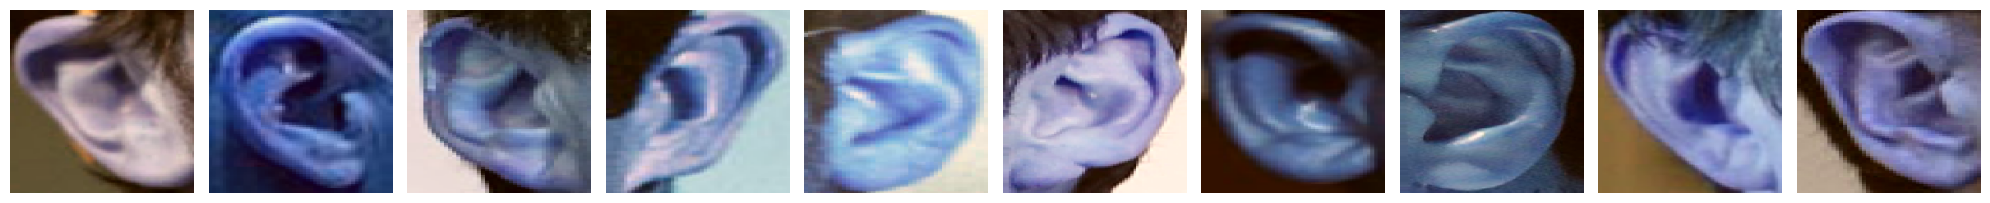

One-hot encoded labels:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [27]:
plotImages(imgs)
print("One-hot encoded labels:")
print(labels[:10])  # Print first 10 for brevity

In [28]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout


In [31]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
base_model.trainable = False


In [33]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x) # Change num_classes to 10

In [34]:
model = Model(inputs=base_model.input, outputs=x)

In [35]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,887,562 (14.83 MB)

 Trainable params: 658,698 (2.51 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [36]:
from tensorflow.keras.optimizers import SGD
model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [37]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

In [38]:
import os
import re

path = "/content/drive/My Drive/AWEDataset/awe"
file_dict = {}
for folder in os.listdir(path):
    if re.match(r'^\d{3}$', folder):  # Only include folders with exactly three digits
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            png_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
            file_dict[folder] = [os.path.join(folder_path, f) for f in png_files]

In [39]:
file_dict_10 = {k: v for k, v in file_dict.items() if int(k) <= 10}
print(f"Total classes (10): {len(file_dict_10)}")
print(f"Files in 001: {len(file_dict_10.get('001', []))}")

Total classes (10): 10
Files in 001: 100


In [40]:
import random

random.seed(7)  # For reproducibility
train_files = []
val_files = []
test_files = []

for class_name, files in file_dict_10.items():
    random.shuffle(files)  # Shuffle files within each class
    train_count = int(len(files) * 0.7)
    val_count = int(len(files) * 0.2)
    test_count = len(files) - train_count - val_count

    train_files.extend(files[:train_count])
    val_files.extend(files[train_count:train_count + val_count])
    test_files.extend(files[train_count + val_count:])

print(f"Train files: {len(train_files)}")
print(f"Val files: {len(val_files)}")
print(f"Test files: {len(test_files)}")

Train files: 698
Val files: 199
Test files: 101


In [41]:
import shutil

output_dir = '/content/drive/My Drive/AWEDataset/awe/Split_Data'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

# Create directories if they don’t exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Copy files to their respective directories
for split_files, split_dir in [(train_files, train_dir), (val_files, val_dir), (test_files, test_dir)]:
    for file_path in split_files:
        class_name = file_path.split('/')[-2]  # Extract class name (e.g., '001')
        dest_dir = os.path.join(split_dir, class_name)
        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy(file_path, dest_dir)
!ls "/content/drive/My Drive/AWEDataset/awe/Split_Data/train/001"

001_0_1173.png	001_0_2553.png	001_0_3709.png	001_0_5561.png	001_0_7152.png	001_0_9142.png
001_0_1176.png	001_0_2577.png	001_0_3772.png	001_0_5801.png	001_0_7470.png	001_0_919.png
001_0_119.png	001_0_2678.png	001_0_3797.png	001_0_5928.png	001_0_7749.png	001_0_9313.png
001_0_1232.png	001_0_2749.png	001_0_3856.png	001_0_6055.png	001_0_7860.png	001_0_9328.png
001_0_1330.png	001_0_2762.png	001_0_3885.png	001_0_6059.png	001_0_7942.png	001_0_9541.png
001_0_1640.png	001_0_285.png	001_0_450.png	001_0_6159.png	001_0_7972.png	001_0_9859.png
001_0_1800.png	001_0_2860.png	001_0_466.png	001_0_6374.png	001_0_8053.png	001_0_9956.png
001_0_1919.png	001_0_2966.png	001_0_4707.png	001_0_644.png	001_0_8354.png	01.png
001_0_2086.png	001_0_2978.png	001_0_5014.png	001_0_6595.png	001_0_8495.png	02.png
001_0_2207.png	001_0_304.png	001_0_5039.png	001_0_6751.png	001_0_8592.png	03.png
001_0_2270.png	001_0_3265.png	001_0_518.png	001_0_6757.png	001_0_8694.png	04.png
001_0_2294.png	001_0_326.png	001_0_5333.png	001_0_

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Training generator with augmentation (adjusted for MobileNet)
train_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,  # Changed to MobileNet preprocessing
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Validation and test generators (no augmentation, just preprocessing)
valid_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)
test_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)

# Create data flows
train_ds = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),  # MobileNet input size
    batch_size=32,
    class_mode='categorical'
)

valid_ds = valid_gen.flow_from_directory(
    directory=val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_ds = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep order for evaluation
)



Found 7182 images belonging to 100 classes.
Found 2145 images belonging to 100 classes.
Found 1136 images belonging to 100 classes.


In [43]:
import shutil
import os

output_dir = '/content/drive/My Drive/AWEDataset/awe/Split_Data'
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

# Clear existing Split_Data
shutil.rmtree(output_dir, ignore_errors=True)

# Recreate directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
# Copy files to their respective directories
for split_files, split_dir in [(train_files, train_dir), (val_files, val_dir), (test_files, test_dir)]:
    for file_path in split_files:
        class_name = file_path.split('/')[-2]  # Extract class name (e.g., '001')
        dest_dir = os.path.join(split_dir, class_name)
        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy(file_path, dest_dir)
# Create data flows
train_ds = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_ds = valid_gen.flow_from_directory(
    directory=val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_ds = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 698 images belonging to 10 classes.
Found 199 images belonging to 10 classes.
Found 101 images belonging to 10 classes.


In [44]:
# Check the number of classes detected by the generator
print("Train classes:", train_ds.class_indices)
print("Number of train classes:", len(train_ds.class_indices))

# Check the shape of the labels
for imgs, labels in train_ds:
    print("Labels shape:", labels.shape)  # Should be (32, 10)
    break

Train classes: {'001': 0, '002': 1, '003': 2, '004': 3, '005': 4, '006': 5, '007': 6, '008': 7, '009': 8, '010': 9}
Number of train classes: 10
Labels shape: (32, 10)


In [45]:
from tensorflow.keras.optimizers import SGD

model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),  # Stochastic Gradient Descent
    loss='categorical_crossentropy',                  # Loss for categorical labels
    metrics=['accuracy']                              # Track accuracy during training
)

In [46]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
# Define callbacks
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)  # Reduce learning rate if no improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Stop early if no improvement
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')  # Save best model
# Train the model
history = model.fit(
    train_ds,
    epochs=50,              # Maximum number of epochs
    validation_data=valid_ds,
    callbacks=[lr_schedule, early_stopping, checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1699 - loss: 12.9057

22/22 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.1708 - loss: 12.8909 - val_accuracy: 0.4975 - val_loss: 11.6782 - learning_rate: 0.0100
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2704 - loss: 11.6010

22/22 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.2710 - loss: 11.5917 - val_accuracy: 0.5276 - val_loss: 10.5609 - learning_rate: 0.0100
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3940 - loss: 10.6327

22/22 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.3947 - loss: 10.6210 - val_accuracy: 0.6533 - val_loss: 9.5624 - learning_rate: 0.0100
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4675 - loss: 9.6130

22/22 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.4681 - loss: 9.6061 - val_accuracy: 0.6633 - val_loss: 8.7167 - learning_rate: 0.0100
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5659 - loss: 8.7842

22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.5662 - loss: 8.7769 - val_accuracy: 0.7437 - val_loss: 7.8355 - learning_rate: 0.0100
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5668 - loss: 8.1125

22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.5681 - loss: 8.1042 - val_accuracy: 0.7739 - val_loss: 7.2638 - learning_rate: 0.0100
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6576 - loss: 7.3674

22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.6572 - loss: 7.3618 - val_accuracy: 0.8040 - val_loss: 6.5908 - learning_rate: 0.0100
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7028 - loss: 6.7043

22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7029 - loss: 6.7007 - val_accuracy: 0.9095 - val_loss: 6.0024 - learning_rate: 0.0100
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7352 - loss: 6.2102 - val_accuracy: 0.8744 - val_loss: 5.5309 - learning_rate: 0.0100
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7669 - loss: 5.6935 - val_accuracy: 0.8844 - val_loss: 5.1530 - learning_rate: 0.0100
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7752 - loss: 5.3317 - val_accuracy: 0.8693 - val_loss: 4.8202 - learning_rate: 0.0100
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7614 - loss: 5.0158 - val_accuracy: 0.8693 - val_loss: 4.4621 - learning_rate: 0.0100
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7718 - loss: 4.6693

22/22 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7717 - loss: 4.6659 - val_accuracy: 0.9347 - val_loss: 4.0539 - learning_rate: 0.0100
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8139 - loss: 4.3115

22/22 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.8126 - loss: 4.3110 - val_accuracy: 0.9799 - val_loss: 3.7289 - learning_rate: 0.0100
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.8192 - loss: 4.0244 - val_accuracy: 0.9598 - val_loss: 3.4822 - learning_rate: 0.0100
Epoch 16/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.7978 - loss: 3.8030 - val_accuracy: 0.8945 - val_loss: 3.2748 - learning_rate: 0.0100
Epoch 17/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.8074 - loss: 3.5751 - val_accuracy: 0.9296 - val_loss: 3.0902 - learning_rate: 0.0100
Epoch 18/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8115 - loss: 3.3312 - val_accuracy: 0.9146 - val_loss: 2.9452 - learning_rate: 0.0100
Epoch 19/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.7909 - loss: 3.1622 - val_accuracy: 0.9246 - val_loss: 2.6960 - learning_rate: 0.0100
Epoch 20/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8372 - loss: 2.9123 - val_accuracy: 0.924

22/22 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.8225 - loss: 1.2766 - val_accuracy: 0.9849 - val_loss: 0.9025 - learning_rate: 0.0100
Epoch 49/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8399 - loss: 1.2203 - val_accuracy: 0.9749 - val_loss: 0.9003 - learning_rate: 0.0100
Epoch 50/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8197 - loss: 1.2749 - val_accuracy: 0.9447 - val_loss: 0.8854 - learning_rate: 0.0100


In [50]:
# Save the model in .h5 format
new_model.save('mobilenet_model.h5')

# Alternatively, save the model in .keras format (recommended for newer TensorFlow versions)
new_model.save('mobilenet_model.keras')

In [51]:
from tensorflow.keras.models import load_model

# Load the model from .h5 file
loaded_model = load_model('mobilenet_model.h5')

# Alternatively, load from .keras file
# loaded_model = load_model('mobilenet_model.keras')

In [58]:
# Compile the model with 'categorical_crossentropy' loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_ds)

# Print the results
print(f"Test Loss: {test_loss * 100:.2f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9635 - loss: 0.8382
Test Loss: 85.52
Test Accuracy: 95.05%


In [61]:
import numpy as np

# Get predictions for the test dataset
predictions = new_model.predict(test_ds)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels from the test dataset
true_classes = test_ds.classes

# Print some predictions and true labels for comparison
print("Predicted classes:", predicted_classes[:10])
print("True classes:", true_classes[:10])

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step
Predicted classes: [731 714 714 714 714 714 371 168 714 358]
True classes: [0 0 0 0 0 0 0 0 0 0]


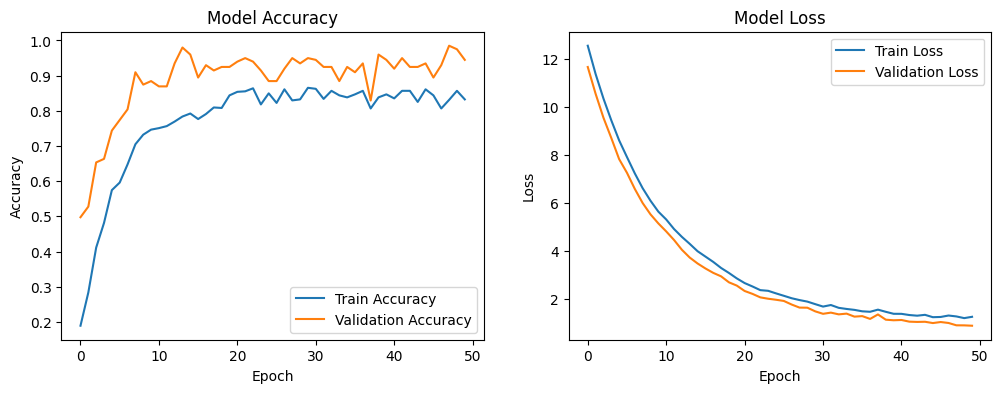

In [62]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [69]:
# Import necessary libraries
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import SGD
import numpy as np

# Load the MobileNetV2 model without the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Add custom layers on top of the base model
x = GlobalAveragePooling2D()(base_model.output)  # Reduce spatial dimensions
x = Dense(512, activation='relu')(x)             # Fully connected layer
x = Dropout(0.5)(x)                              # Dropout for regularization
x = Dense(256, activation='relu')(x)             # Another fully connected layer
x = Dropout(0.5)(x)                              # Additional dropout
x = Dense(10, activation='softmax')(x)  # Output layer

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),  # SGD optimizer
    loss='categorical_crossentropy',                  # Loss for multi-class classification
    metrics=['accuracy']                              # Track accuracy
)
# Step 3: Make predictions on the test set
predictions = model.predict(test_ds, steps=len(test_ds), verbose=0)

# Step 4: Print the predicted class labels
for encoded_labels in np.round(predictions):
    print(np.argmax(encoded_labels))


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [74]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('mobilenet_model.h5')

# Make predictions
predictions = model.predict(test_ds, steps=len(test_ds), verbose=0)
for encoded_labels in np.round(predictions):
    print(np.argmax(encoded_labels))

0
0
714
0
0
0
0
0
0
0
0
714
0
0
0
0
0
0
0
0
0
714
0
0
0
906
376
0
0
714
0
714
0
0
0
0
0
0
0
0
0
0
0
0
0
0
149
714
0
0
0
376
0
885
0
0
376
273
0
0
0
0
0
0
0
0
502
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
148
0
0
502
0
0
